# Limpeza de Dados

Os processos de limpeza e preparação de dados são muito importantes. Dados limpos, completos e organizados tornam as análises mais fáceis e confiáveis. Abaixo descrevemos alguns dos principais mecanismos para tratar dados que tenham algum problema.

Execute cada célula de código abaixo para ver o resultado.

## Leitura e análise inicial dos dados


In [21]:
#importação de bibliotecas
import pandas as pd

%matplotlib inline

In [22]:
# lê o arquivo CSV

df = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [23]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


O método `info` é útil para vermos quais colunas do DataFrame tiveram seus tipos de dados corretamente identificados pelo Pandas. No caso abaixo já é possível identificar alguns problemas. As colunas *quartos, suite, area, aluguel e condomínio* foram interpretadas como objetos genéricos enquanto deveriam ser numéricas. A coluna *data* deveria ser do tipo `datetype`.

O método `info` também nos informa quantos valores cada coluna tem. Veja abaixo que a coluna *endereço* tem apenas 19 valores.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Localizando e tratando valores inválidos

Uma forma prática de identificar potenciais problemas é exibir todas as linhas com valores em branco (*NaN*). Abaixo podemos verificar que uma das linhas não tem o valor para a coluna *endereco*.

In [25]:
df[df.isna().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Podemos usar o método `fillna` para substituir os valores em branco por um valor definido, neste caso a *String* "Desconhecido". Após a substituição não há mais linhas com valores em branco.

In [26]:
df['Rating'] = df['Rating'].fillna("Desconhecido")

df[df.isna().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,Desconhecido
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,Desconhecido
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,Desconhecido
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,Desconhecido
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,Desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Podemos também fazer substituições de partes das *strings* no DataFrame. Por exemplo, podemos padronizar nomes com as abreviações GAME BOY para GB. O código abaixo faz isto:

In [28]:
df['Platform'] = df['Platform'].str.replace('Game boy', 'GB')


df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,Desconhecido
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,Desconhecido


Ainda não sabemos por que diversas colunas numéricas foram identificadas com o tipo genérico *objeject*. Uma forma de averiguar é listar todos os valores não repetidos de uma coluna. O método `unique` é útil neste caso. Abaixo podemos ver que a coluna *Name* contém uma ou mais interrogações (?) entre os valores.

In [29]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Vamos então exibir todas as linhas com "Desconhecido" em alguma coluna. O comando abaixo identificou que as linhas de índice 659 e 14246 contém vários valores representados com uma Desconhecidos.

In [30]:
df[df['Name'] == 'Desconhecido']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


Como a linha identificada acima tem muitos valores inválidos, podemos decidir retirá-la do DataFrame. Para isso, usamos o método `drop`. Perceba que a linha não aparece mais no DataFrame.

In [31]:
# para deleção da linha basta passar o índice
#df = df.drop(19)

#df.dropna()
#df.dropna(how='all')
#df.dropna(subset=['name', 'toy'])
#df.dropna(inplace=True)
df.drop(659, inplace=True)
df.drop(14246, inplace=True)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,Desconhecido
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,Desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Desconhecido


Também podemos remover uma coluna inteira com o comando (tips.drop), com isso vamos remover colunas com muitos valores "Desconhecidos".

In [32]:
#Localizando colunas com muitos valores Desconhecidos:

#df[df['Year_of_Release'] == 'Desconhecido']
#df[df['Publisher'] == 'Desconhecido']
#df[df['Critic_Score'] == 'Desconhecido']
#df[df['User_Count'] == 'Desconhecido']

#Removendo colunas com muitos valores Desconhecidos:

df_2 = df.drop(columns=['Year_of_Release', 'Publisher','Critic_Count','Critic_Count','User_Score','User_Score',
'Developer','Rating','Critic_Score','User_Count' ])


df_2.head()

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


Como já vimos anteriormente, podemos criar uma coluna com o total do aluguel somado com o condomínio. Vamos calcular novamente.

Renomeando colunas para facilitar o entendimendo. (df.renamedf.rename(columns={'nome atual': 'novo nome'}, inplace = True))

In [45]:
#Renomeando:

#df_2.rename(columns={'Name': 'NOME'}, inplace = True)
#df_2.rename(columns={'Platform': 'PLATAFORMA'}, inplace = True)
#df_2.rename(columns={'Genre': 'GENERO'}, inplace = True)
#df_2.rename(columns={'EU_Sales': 'VENDAS(EU)'}, inplace = True)
#df_2.rename(columns={'JP_Sales': 'VENDAS(JP)'}, inplace = True)
#df_2.rename(columns={'Other_Sales': 'VENDAS(Outros)'}, inplace = True)
#df_2.rename(columns={'Global_Sales': 'VENDAS(GLOBAL)'}, inplace = True)


df_2.head()

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [46]:
df_2['soma_total'] = df_2['VENDAS(EU)'] + df_2['VENDAS(JP)']
df_2

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL),soma_total
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53,32.73
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,10.39
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52,16.55
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77,14.21
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37,19.11
...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01,0.01
16715,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01,0.01
16716,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01,0.01
16717,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01,0.00


In [47]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME            16717 non-null  object 
 1   PLATAFORMA      16717 non-null  object 
 2   GENERO          16717 non-null  object 
 3   VENDAS(AN)      16717 non-null  float64
 4   VENDAS(EU)      16717 non-null  float64
 5   VENDAS(JP)      16717 non-null  float64
 6   VENDAS(Outros)  16717 non-null  float64
 7   VENDAS(GLOBAL)  16717 non-null  float64
 8   soma_total      16717 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


Para renomear as colunas podemos utilizar o método `rename` conforme bloco abaixo.

In [60]:
df_3 = df_2.rename(columns={'soma_total': '(NA)/(EU)/(JP)'})
df_3

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL),(NA)/(EU)/(JP)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53,32.73
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,10.39
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52,16.55
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77,14.21
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37,19.11
...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01,0.01
16715,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01,0.01
16716,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01,0.01
16717,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01,0.00


Após efetiuramos as análises e se não vamos mais precisar da coluna podemos remover a coluna utiliza o comando `drop`

In [61]:
# Para deleção de uma coluna basta passar por parametro quais colunas deseja deletar
#df = df.drop(columns=['total'])

df_3.drop(columns=['(NA)/(EU)/(JP)'], inplace=True)
df_3

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01


## Conversão de tipos

Como pode ser visto pela execução do método `info` abaixo, as colunas ainda possuem tipos incorretos. Precisamos então fazer a conversão manual dos tipos.

In [62]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME            16717 non-null  object 
 1   PLATAFORMA      16717 non-null  object 
 2   GENERO          16717 non-null  object 
 3   VENDAS(AN)      16717 non-null  float64
 4   VENDAS(EU)      16717 non-null  float64
 5   VENDAS(JP)      16717 non-null  float64
 6   VENDAS(Outros)  16717 non-null  float64
 7   VENDAS(GLOBAL)  16717 non-null  float64
 8   soma_total      16717 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


Para converter as colunas para os tipos adequados, usamos o método `astype`. Podemos tanto aplicar a uma coluna por vez ou em várias colunas representadas por um dicionário. O código abaixo exemplifica as duas abordagens:

In [63]:
df_3['NOME'] = df_2['NOME'].astype(str)

df_3 = df_2.astype({'PLATAFORMA': str, 'GENERO': str, 'VENDAS(AN)': float, 'VENDAS(EU)': float,'VENDAS(JP)': float,'VENDAS(Outros)': float, 'VENDAS(GLOBAL)': float})

In [64]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME            16717 non-null  object 
 1   PLATAFORMA      16717 non-null  object 
 2   GENERO          16717 non-null  object 
 3   VENDAS(AN)      16717 non-null  float64
 4   VENDAS(EU)      16717 non-null  float64
 5   VENDAS(JP)      16717 non-null  float64
 6   VENDAS(Outros)  16717 non-null  float64
 7   VENDAS(GLOBAL)  16717 non-null  float64
 8   soma_total      16717 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


Para uma coluna com datas, precisamos usar um comando diferente, o `to_datetime`. Ao executar o comando abaixo obtemos um erro informando que há um valor de data contendo 'janeiro 17', que não pode ser interpretado pelo método.

In [ ]:
#df['data'] = pd.to_datetime(df['data'])

Abaixo substituimos o valor com problema e com isso conseguimos converter corretamente a coluna.

In [ ]:
df['data'] = df['data'].str.replace('janeiro 17', '01/01/17')

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y')

#Casos em datas com diferentes formatos podem ser trabalhados com o format
# format='%Y%m%d' = '20210305'
# format='%d%m%Y' = '05032021'
# format='%d-%b-%Y' = '05-Mar-2021'

Agora podemos conferir os tipos e verificar que estão todos corretos:

In [55]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME            16717 non-null  object 
 1   PLATAFORMA      16717 non-null  object 
 2   GENERO          16717 non-null  object 
 3   VENDAS(AN)      16717 non-null  float64
 4   VENDAS(EU)      16717 non-null  float64
 5   VENDAS(JP)      16717 non-null  float64
 6   VENDAS(Outros)  16717 non-null  float64
 7   VENDAS(GLOBAL)  16717 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


Com todos os tipos convertidos corretamente, podemos aplicar funções estatísticas e exibir corretamente os valores em gráficos como mostrado abaixo:

Média de vendas globais:  0.5334617455285808


<AxesSubplot:xlabel='GENERO'>

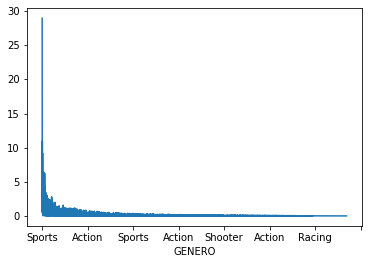

In [65]:
print('Média de vendas globais: ', df_3['VENDAS(GLOBAL)'].mean())

df_3.set_index('GENERO')['VENDAS(EU)'].plot()

In [66]:
df_3

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL),soma_total
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53,32.73
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,10.39
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52,16.55
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77,14.21
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37,19.11
...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01,0.01
16715,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01,0.01
16716,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01,0.01
16717,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01,0.00


## Escrevendo os dados limpos no disco

Para salvar os dados limpos em um arquivo, usamos o método `to_csv`, como no exemplo abaixo:

In [67]:
df_3.to_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_2016(LIMPO2).csv', index=False)